# Disease Risk Prediction

### 1- Problem statement

- The goal of this project is to build a machine learning model that predicts whether a person is at risk of disease based on health-related factors. The model analyzes user-provided inputs (age, gender, smoking status, blood pressure, cholesterol, etc.) and returns a prediction to help early identification of individuals who may require medical attention.

### 2- Import Libraries 

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 3 - DATASET EXPLORATION

#### Load data

In [39]:
disease_data = pd.read_csv('synthetic_disease_risk_dataset.csv')
disease_data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
0,P100000,69,Female,27.8,Never,NaN,Low,92,117,297,156,Yes,0.52,NaN,No
1,P100001,32,Female,32.0,Never,Moderate,Moderate,149,77,279,163,Yes,0.50,NaN,Yes
2,P100002,89,Male,24.2,Former,High,High,124,82,189,139,Yes,0.37,Diagnosed,No
3,P100003,78,Male,23.8,Never,NaN,Moderate,118,81,159,169,No,0.55,NaN,No
4,P100004,38,Male,29.8,Never,Moderate,Moderate,164,63,213,97,Yes,0.59,Pre-disease,No


In [40]:
disease_data.describe()

,Age,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Genetic_Risk_Score
count,4000.00000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,53.22350,27.008025,134.64150,89.529500,224.404500,133.946250,0.500140
std,20.63234,5.020856,25.92738,17.455996,43.255458,38.027857,0.099428
min,18.00000,6.700000,90.00000,60.000000,150.000000,70.000000,0.200000
25%,36.00000,23.600000,113.00000,74.000000,187.000000,100.000000,0.430000
50%,53.00000,27.000000,134.00000,89.000000,223.000000,134.000000,0.500000
75%,71.00000,30.400000,157.00000,105.000000,262.000000,167.000000,0.570000
max,89.00000,44.800000,179.00000,119.000000,299.000000,199.000000,0.930000


### Check missig and duplicated values

In [41]:
print(f'Sum of missing values : {disease_data.isnull().sum().sum()}')

Sum of missing values : 3666


In [42]:
print(f'Sum of duplicated values : {disease_data.duplicated().sum().sum()}')

Sum of duplicated values : 0


In [43]:
print(f"Dataset shape: {disease_data.shape}")

Dataset shape: (4000, 15)


### Dataset info

In [44]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                4000 non-null   object 
 1   Age                       4000 non-null   int64  
 2   Gender                    4000 non-null   object 
 3   BMI                       4000 non-null   float64
 4   Smoking_Status            4000 non-null   object 
 5   Alcohol_Consumption       2361 non-null   object 
 6   Physical_Activity_Level   4000 non-null   object 
 7   Blood_Pressure_Systolic   4000 non-null   int64  
 8   Blood_Pressure_Diastolic  4000 non-null   int64  
 9   Cholesterol_Level         4000 non-null   int64  
 10  Glucose_Level             4000 non-null   int64  
 11  Family_History            4000 non-null   object 
 12  Genetic_Risk_Score        4000 non-null   float64
 13  Previous_Diagnosis        1973 non-null   object 
 14  Disease_

In [45]:
disease_data = disease_data.drop(columns='Patient_ID', axis=1)

## Histogramme

Index(['Age', 'BMI', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Level', 'Glucose_Level', 'Genetic_Risk_Score'],
      dtype='object')


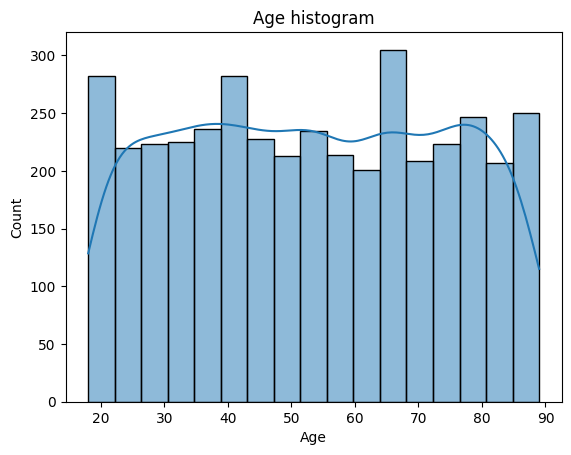

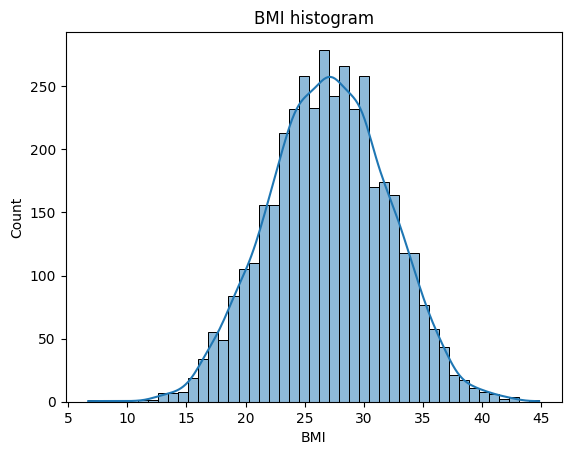

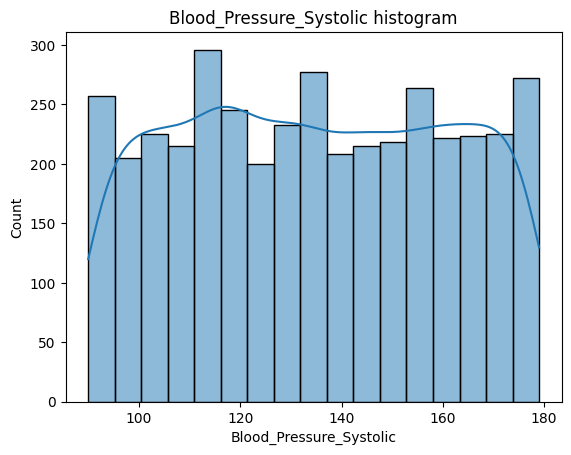

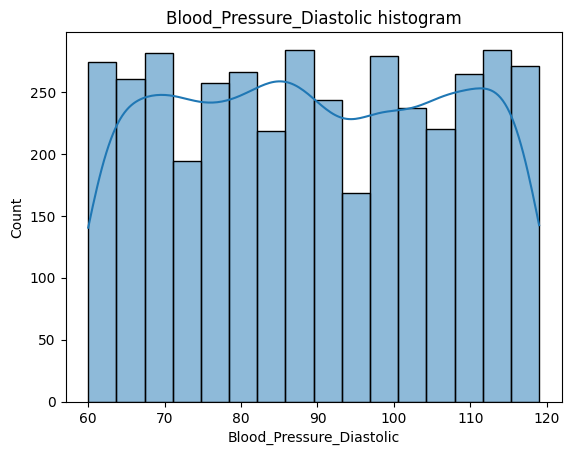

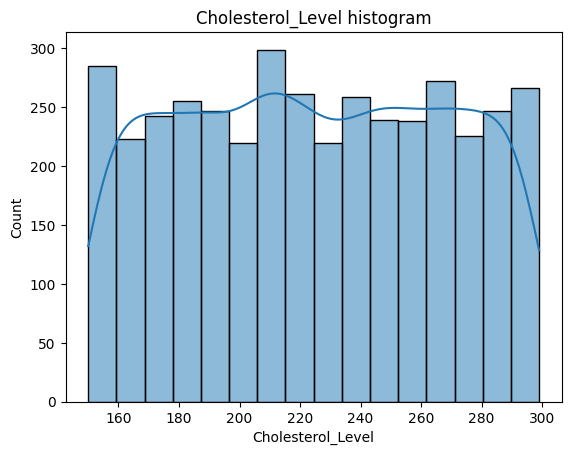

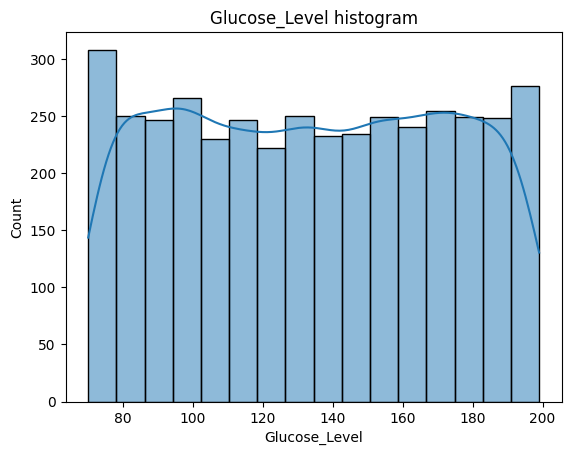

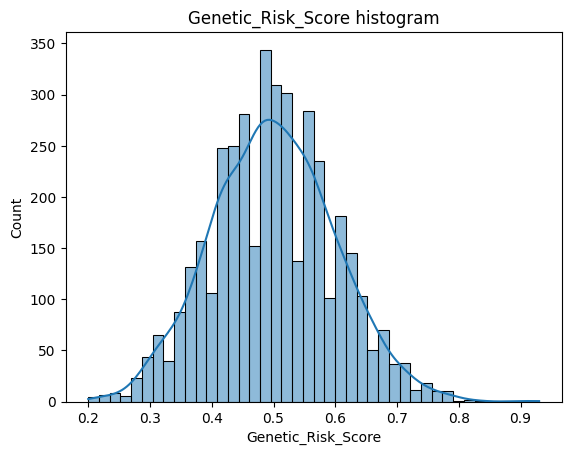

In [46]:
numerical_features = disease_data.select_dtypes(include='number').columns
print(numerical_features)
for col in numerical_features:
    sns.histplot(disease_data[col], kde=True)
    plt.title(f'{col} histogram')
    plt.show()

# Box Plot 

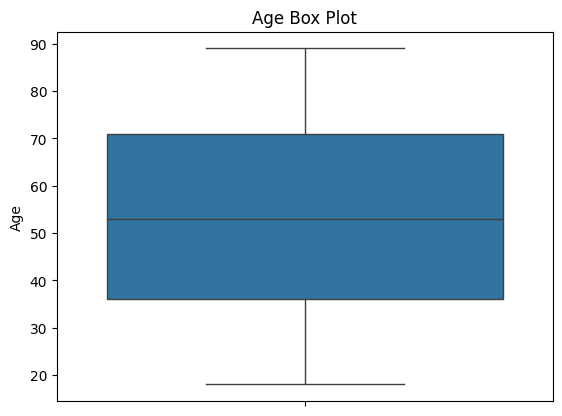

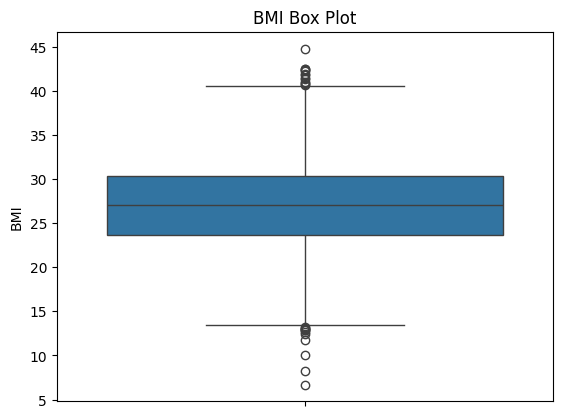

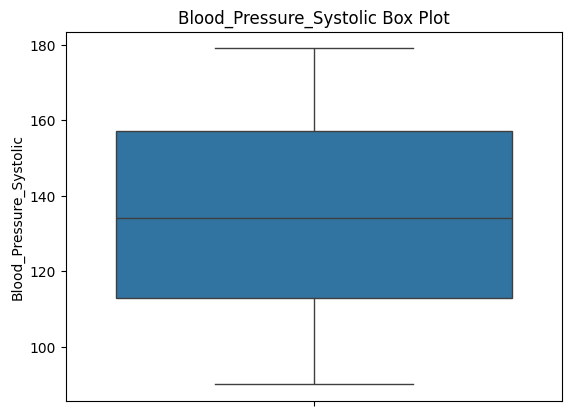

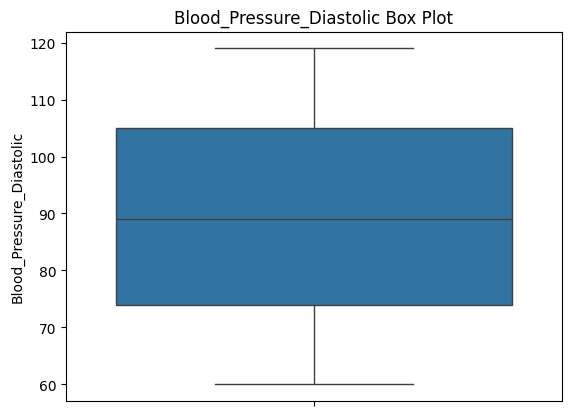

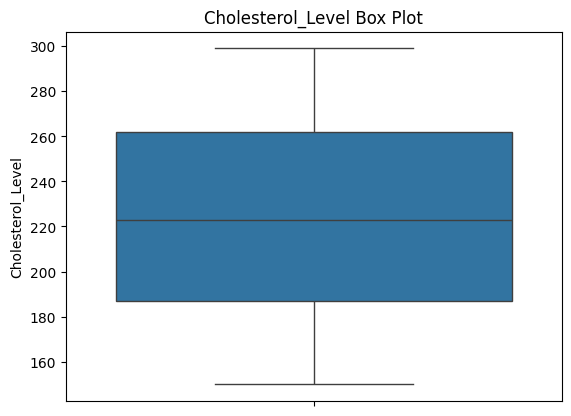

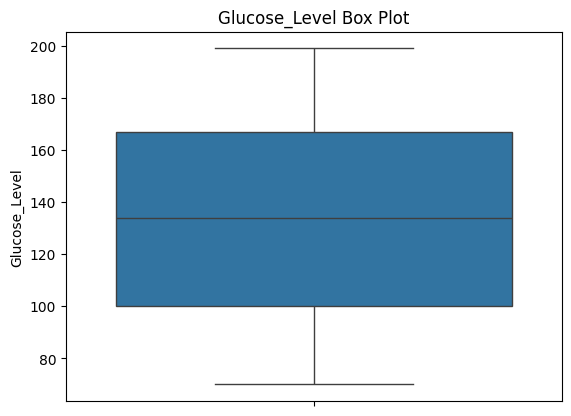

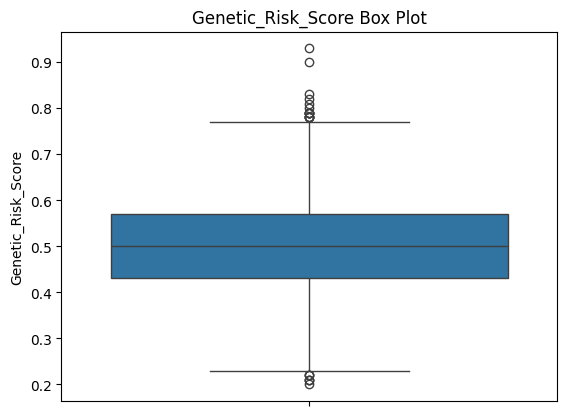

In [47]:
for col in numerical_features:
    sns.boxplot(disease_data[col])
    plt.title(f'{col} Box Plot')
    plt.show()

# Bar Chart (Categorical)

In [48]:
categorical_features = disease_data.select_dtypes(include='object').columns
categorical_features

Index(['Gender', 'Smoking_Status', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'Family_History', 'Previous_Diagnosis',
       'Disease_Risk'],
      dtype='object')

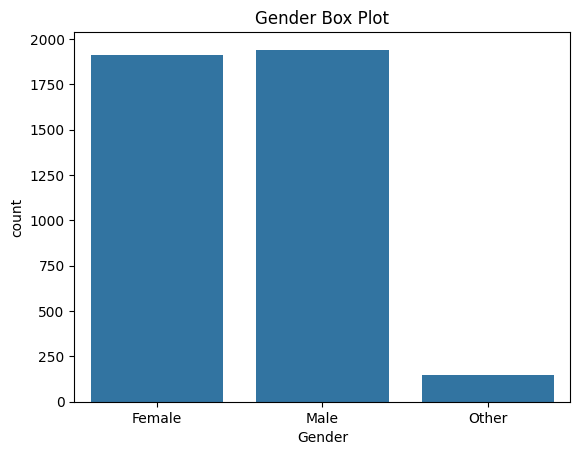

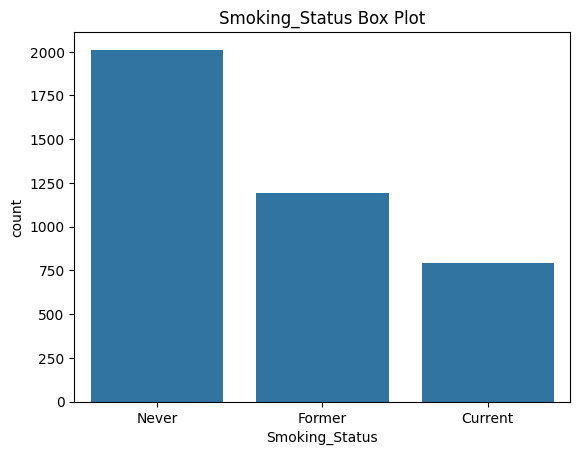

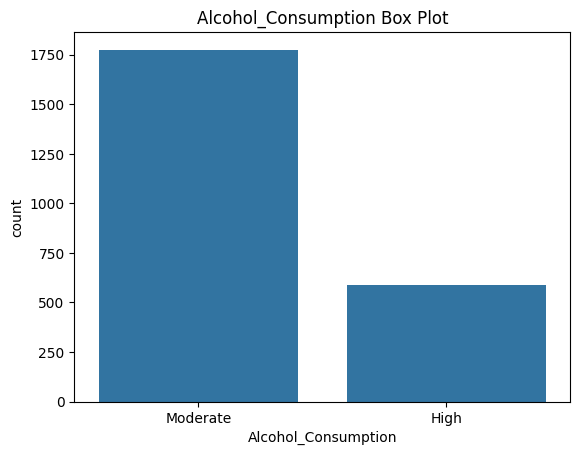

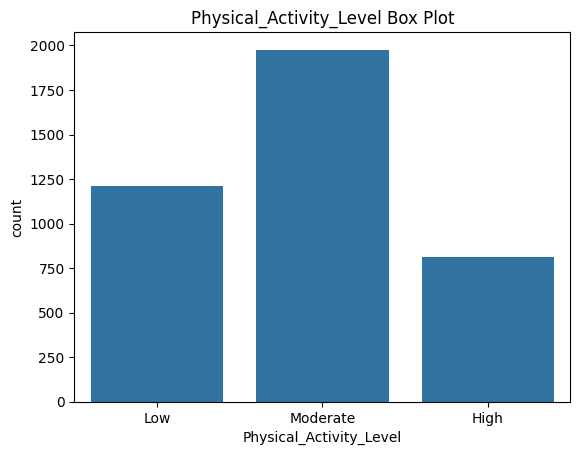

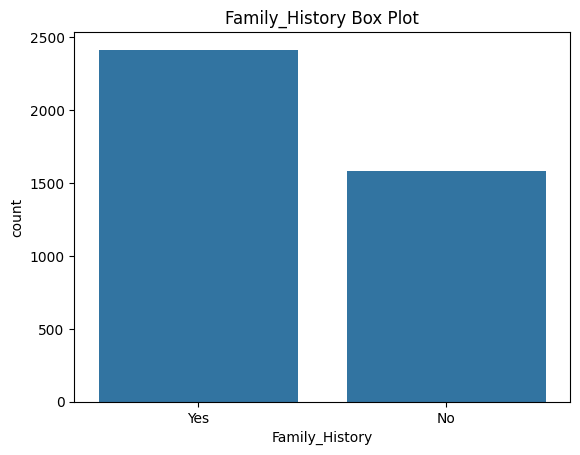

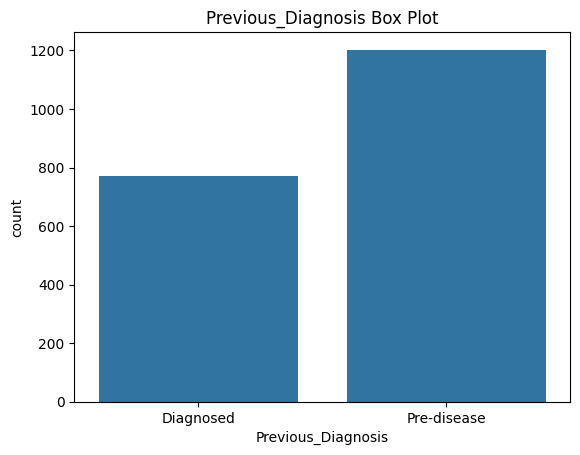

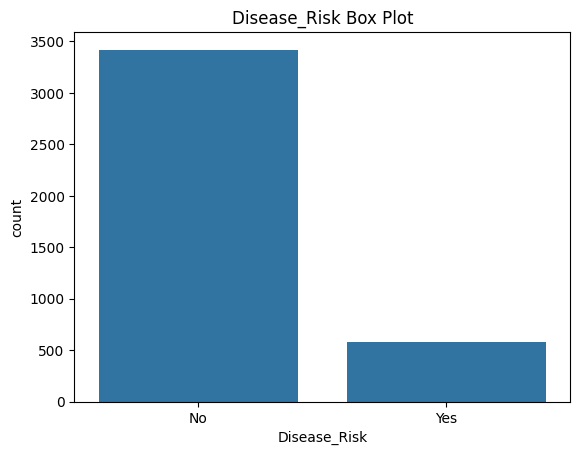

In [49]:
for col in categorical_features:
    sns.countplot(x = disease_data[col])
    plt.title(f'{col} Box Plot')
    plt.show()

# Pie Chart (Categorical)

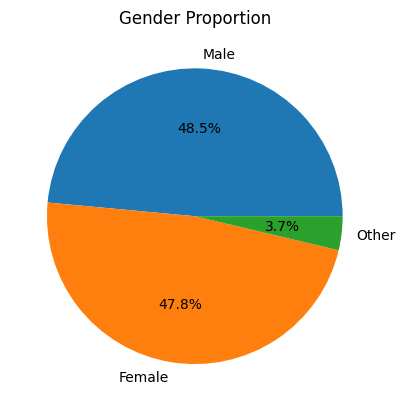

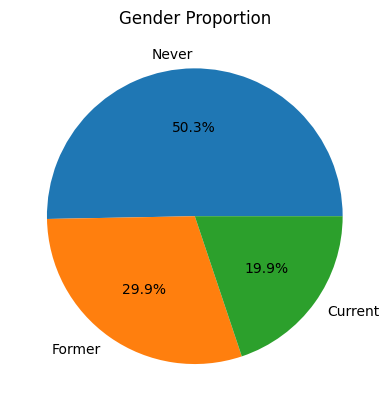

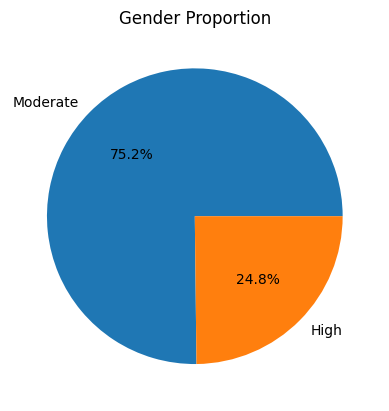

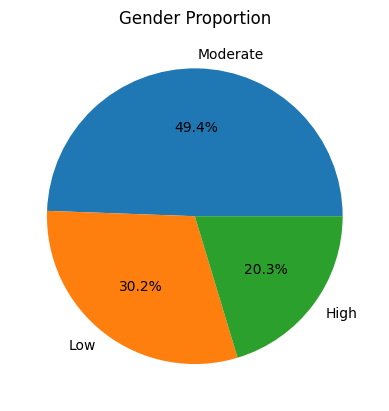

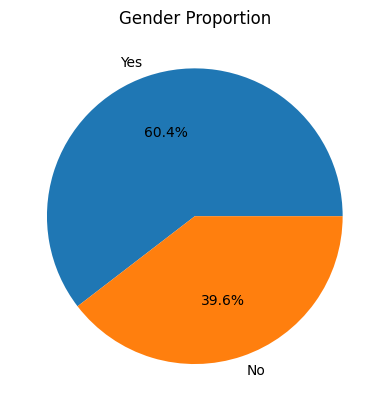

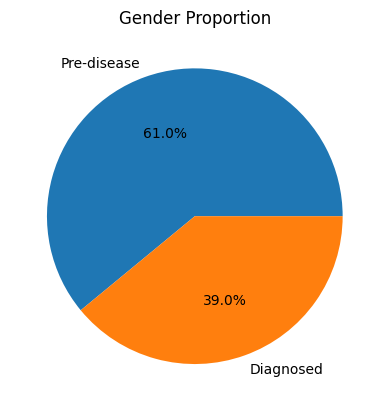

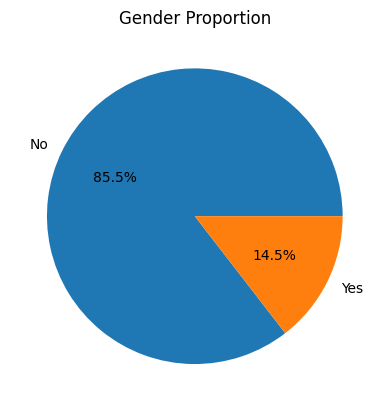

In [50]:
for col in categorical_features:
    disease_data[col].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.ylabel("")
    plt.title("Gender Proportion")
    plt.show()

# Data preprocessing

In [51]:
disease_data.isnull().sum()

Age                            0
Gender                         0
BMI                            0
Smoking_Status                 0
Alcohol_Consumption         1639
Physical_Activity_Level        0
Blood_Pressure_Systolic        0
Blood_Pressure_Diastolic       0
Cholesterol_Level              0
Glucose_Level                  0
Family_History                 0
Genetic_Risk_Score             0
Previous_Diagnosis          2027
Disease_Risk                   0
dtype: int64

In [52]:
disease_data['Alcohol_Consumption'].value_counts()

Alcohol_Consumption
Moderate    1775
High         586
Name: count, dtype: int64

In [53]:
disease_data['Previous_Diagnosis'].value_counts()

Previous_Diagnosis
Pre-disease    1203
Diagnosed       770
Name: count, dtype: int64

### Fill missing values of Alcohol_Consumption and Previous_Diagnosis by mode

In [54]:
disease_data['Alcohol_Consumption'] = disease_data['Alcohol_Consumption'].fillna(disease_data['Alcohol_Consumption'].mode()[0])
disease_data['Previous_Diagnosis'] = disease_data['Previous_Diagnosis'].fillna(disease_data['Previous_Diagnosis'].mode()[0])

In [55]:
disease_data.isnull().sum()

Age                         0
Gender                      0
BMI                         0
Smoking_Status              0
Alcohol_Consumption         0
Physical_Activity_Level     0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Cholesterol_Level           0
Glucose_Level               0
Family_History              0
Genetic_Risk_Score          0
Previous_Diagnosis          0
Disease_Risk                0
dtype: int64

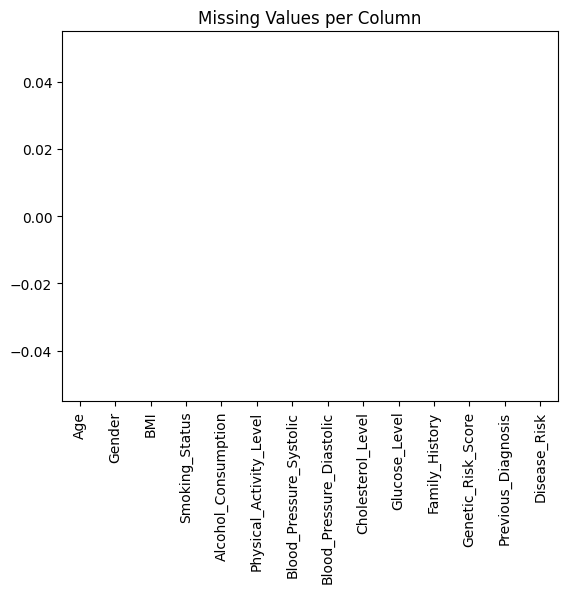

In [56]:
disease_data.isnull().sum().plot(kind="bar")
plt.title("Missing Values per Column")
plt.show()

### Encoding categorical values

In [57]:
for col in disease_data.select_dtypes(include='object'):
    print(disease_data[col].value_counts())

Gender
Male      1941
Female    1911
Other      148
Name: count, dtype: int64
Smoking_Status
Never      2012
Former     1194
Current     794
Name: count, dtype: int64
Alcohol_Consumption
Moderate    3414
High         586
Name: count, dtype: int64
Physical_Activity_Level
Moderate    1977
Low         1210
High         813
Name: count, dtype: int64
Family_History
Yes    2417
No     1583
Name: count, dtype: int64
Previous_Diagnosis
Pre-disease    3230
Diagnosed       770
Name: count, dtype: int64
Disease_Risk
No     3419
Yes     581
Name: count, dtype: int64


In [58]:
for col in disease_data.select_dtypes(include='object'):
    print(disease_data[col].unique())

['Female' 'Male' 'Other']
['Never' 'Former' 'Current']
['Moderate' 'High']
['Low' 'Moderate' 'High']
['Yes' 'No']
['Pre-disease' 'Diagnosed']
['No' 'Yes']


In [59]:
# Deux categorical values
disease_data['Alcohol_Consumption'] = disease_data['Alcohol_Consumption'].map({'Moderate': 0, 'High': 1})
disease_data['Family_History'] = disease_data['Family_History'].map({'No': 0, 'Yes': 1})
disease_data['Previous_Diagnosis'] = disease_data['Previous_Diagnosis'].map({'Pre-disease': 0, 'Diagnosed': 1})
disease_data['Disease_Risk'] = disease_data['Disease_Risk'].map({'No': 0, 'Yes': 1})

In [60]:
# Order categorical 
# Fit LabelEncoders
gender_le = LabelEncoder()
disease_data['Gender'] = gender_le.fit_transform(disease_data['Gender'])

smoking_le = LabelEncoder()
disease_data['Smoking_Status'] = smoking_le.fit_transform(disease_data['Smoking_Status'])

activity_le = LabelEncoder()
disease_data['Physical_Activity_Level'] = activity_le.fit_transform(disease_data['Physical_Activity_Level'])

In [61]:
disease_data.head()

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Glucose_Level,Family_History,Genetic_Risk_Score,Previous_Diagnosis,Disease_Risk
0,69,0,27.8,2,0,1,92,117,297,156,1,0.52,0,0
1,32,0,32.0,2,0,2,149,77,279,163,1,0.50,0,1
2,89,1,24.2,1,1,0,124,82,189,139,1,0.37,1,0
3,78,1,23.8,2,0,2,118,81,159,169,0,0.55,0,0
4,38,1,29.8,2,0,2,164,63,213,97,1,0.59,0,0


### Feature selection

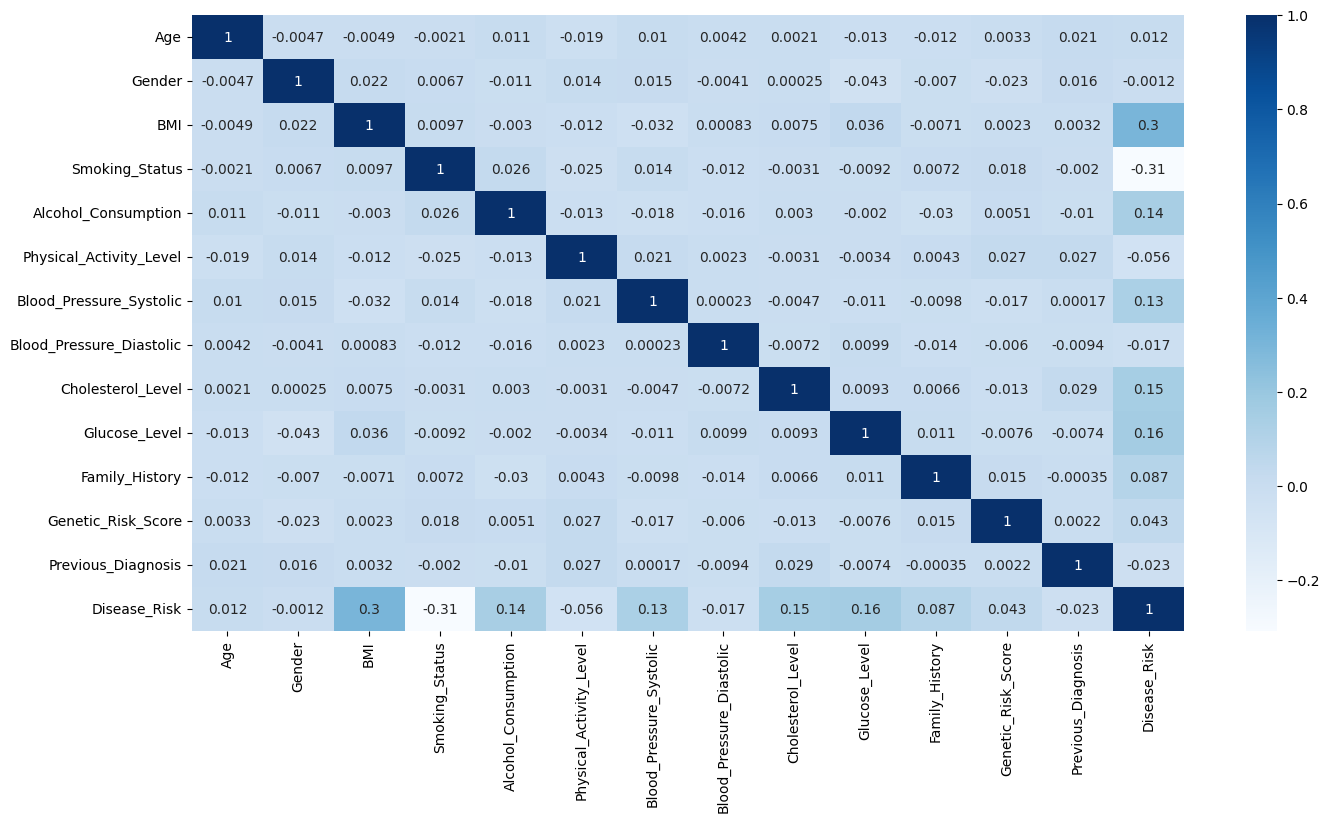

In [62]:
corr_disease = disease_data.corr(numeric_only=True)
plt.figure(figsize=(16, 8))
sns.heatmap(corr_disease, annot=True, cmap='Blues')
plt.show()

## Data Splitting

In [63]:
X = disease_data.drop(columns='Disease_Risk', axis=1)
y = disease_data['Disease_Risk']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3200, 13) (800, 13)
(3200,) (800,)


## Features scaling

In [66]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

# Decision Tree

In [67]:
# model_dt = DecisionTreeClassifier(random_state=42)

# # trainnig the model
# model_dt.fit(X_train, y_train)

# # Evaluate
# y_pred = model_dt.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Support Vector Machine Learning

In [68]:
# model_svm = SVC(kernel='rbf', C=10, gamma=0.1)

# # trainnig the model
# model_svm.fit(X_train, y_train)

# # Evaluate
# y_pred = model_svm.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Random Forest

In [69]:
model_rf = RandomForestClassifier()

# trainnig the model
model_rf.fit(X_train, y_train)

# Evaluate
y_pred = model_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.92625

Confusion Matrix:
 [[673  11]
 [ 48  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       684
           1       0.86      0.59      0.70       116

    accuracy                           0.93       800
   macro avg       0.90      0.79      0.83       800
weighted avg       0.92      0.93      0.92       800



# Logistic Regression

In [70]:
# model_lr = LogisticRegression(max_iter=1000)

# # trainnig the model
# model_lr.fit(X_train, y_train)

# # Evaluate
# y_pred = model_lr.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

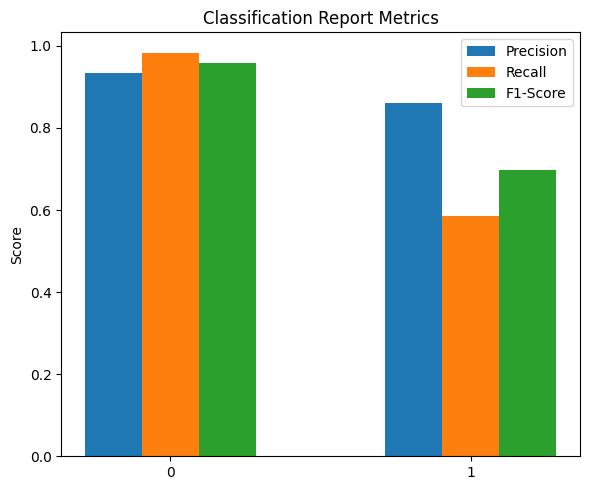

In [80]:
# Récupération du rapport sous forme de dictionnaire
report = classification_report(y_test, y_pred, output_dict=True)

classes = list(report.keys())[:-3]   # enlever 'accuracy', 'macro avg', 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Extraire les valeurs
values = {metric: [report[c][metric] for c in classes] for metric in metrics}

x = np.arange(len(classes))
width = 0.19  # largeur des barres

plt.figure(figsize=(6, 5))

plt.bar(x - width, values['precision'], width, label='Precision')
plt.bar(x, values['recall'], width, label='Recall')
plt.bar(x + width, values['f1-score'], width, label='F1-Score')

plt.xticks(x, classes)
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.legend()
plt.tight_layout()
plt.show()

# Save model and scaler

In [72]:
import joblib
# Save the LabelEncoders
joblib.dump(gender_le, 'gender_le.pkl')
joblib.dump(smoking_le, 'smoking_le.pkl')
joblib.dump(activity_le, 'activity_le.pkl')

# Save scaler and model
joblib.dump(scale, 'scaler.pkl')
joblib.dump(model_rf, 'Disease_Risk_model.pkl')

['Disease_Risk_model.pkl']

In [73]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.860902,-0.915780,-1.548373,0.899512,-0.420084,-0.358064,-0.302508,0.668791,-0.401282,-0.904552,-1.244094,-0.089766,-0.462559
1,-0.480077,0.808041,2.004724,-0.394750,-0.420084,0.926472,0.696566,-0.177423,-1.700409,0.016815,-1.244094,-0.289523,-0.462559
2,0.186366,0.808041,1.439459,0.899512,-0.420084,0.926472,1.080825,1.120105,0.212850,-0.299082,0.803798,0.509505,-0.462559
3,0.567191,-0.915780,0.107047,-1.689011,-0.420084,0.926472,0.120177,-1.192880,1.582838,1.254079,-1.244094,0.309748,2.161888
4,-1.622552,-0.915780,-0.942732,0.899512,-0.420084,0.926472,0.043325,-1.418537,0.283712,-0.141134,0.803798,0.609384,-0.462559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.805207,0.808041,-0.962920,0.899512,-0.420084,0.926472,-1.724267,1.684248,0.897844,0.832883,0.803798,0.109991,2.161888
796,1.233635,0.808041,0.753065,-0.394750,-0.420084,-1.642601,-0.417786,-1.136465,0.590778,-1.431047,0.803798,2.307318,2.161888
797,-0.194459,0.808041,0.308928,0.899512,-0.420084,0.926472,-0.494638,1.120105,0.614398,-1.352073,0.803798,-0.189644,-0.462559
798,1.281238,-0.915780,0.631937,-0.394750,-0.420084,-1.642601,1.003973,1.345762,-0.873692,-0.404381,-1.244094,0.010113,-0.462559


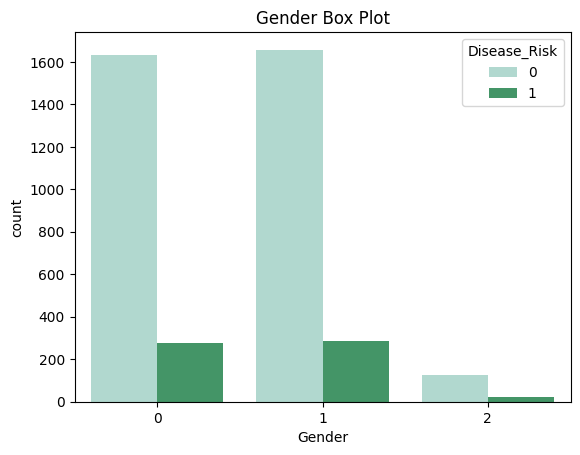

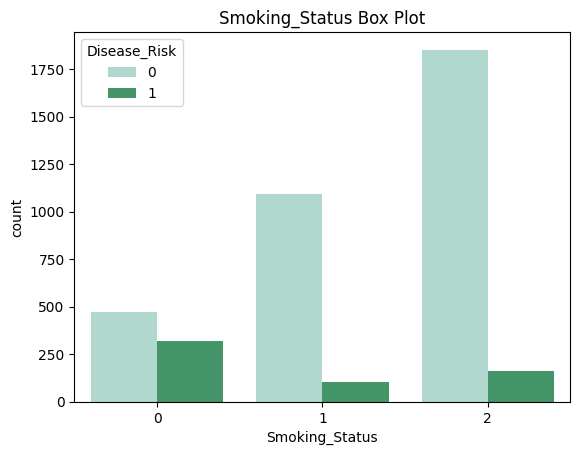

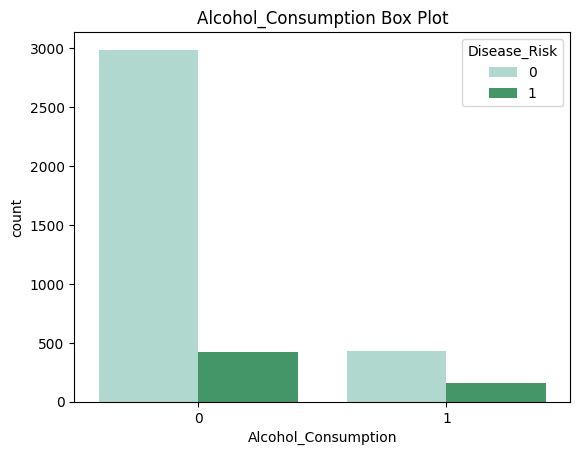

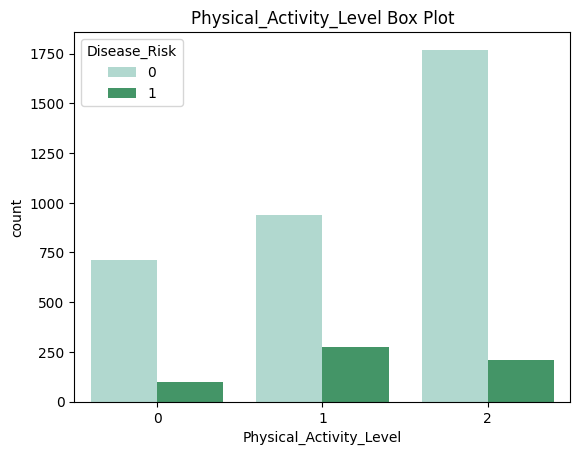

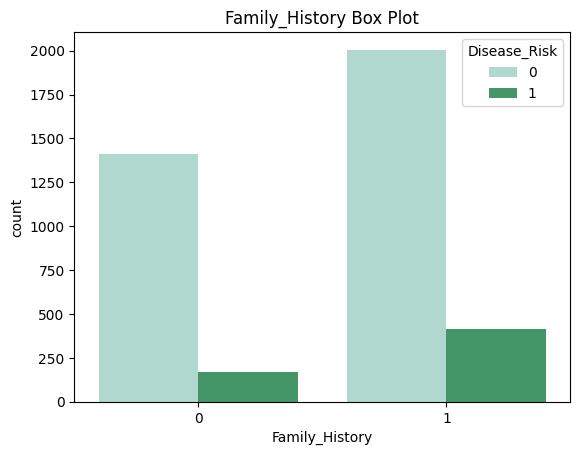

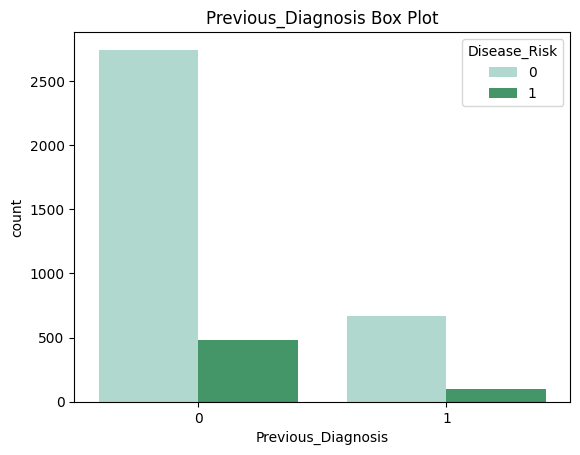

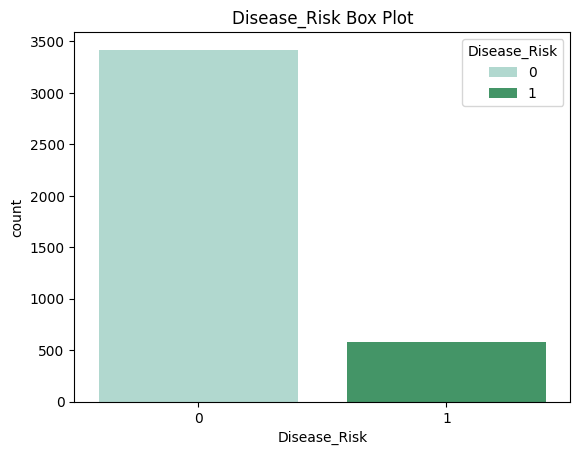

In [ ]:
for col in categorical_features:
    sns.countplot(x = disease_data[col], data=disease_data, hue='Disease_Risk', palette='BuGn')
    plt.title(f'{col} Count Plot')
    plt.show()